<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="cognitiveclass.ai logo">
</center>


# Machine Learning Foundation

## Course 4, Part a: K-Means Clustering LAB


Estimated time needed: **30** minutes


__Purpose:__
The purpose of this lab exercise is to learn how to use an unsupervised learning algorithm, **K-means** using sklearn.   

__At the end of this lab you will be able to:__
> 1. Run a K-means algorithm.
> 2. Understand what parameters are customizable for the algorithm.
> 3. Know how to use the inertia curve to determine the optimal number of clusters.


### K-Means Overview

**K-means** is one of the most basic clustering algorithms.  It relies on finding cluster centers to group data points based on minimizing the sum of squared errors between each datapoint and its cluster center.  


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

%config InlineBackend.figure_formats = ['retina']

In [1]:
import warnings


warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['figure.figsize'] = [6, 6]
sns.set_style('whitegrid')
sns.set_context('talk')

K-means clustering is one of the most simple clustering algorithms.  One of the limitations is that it depends on the starting point of the clusters, and the number of clusters need to be defined beforehand.


### Cluster starting points
Let's start by creating a simple dataset.


In [4]:
def display_cluster(X, km=[], num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    
    if num_clusters == 0:
        plt.scatter(X[:, 0], X[:, 1], c=color[0], alpha=alpha, s=s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_ == i, 0], X[km.labels_ == i, 1], c=color[i], alpha=alpha, s=s)
            plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], c=color[i], marker='x', s=100)

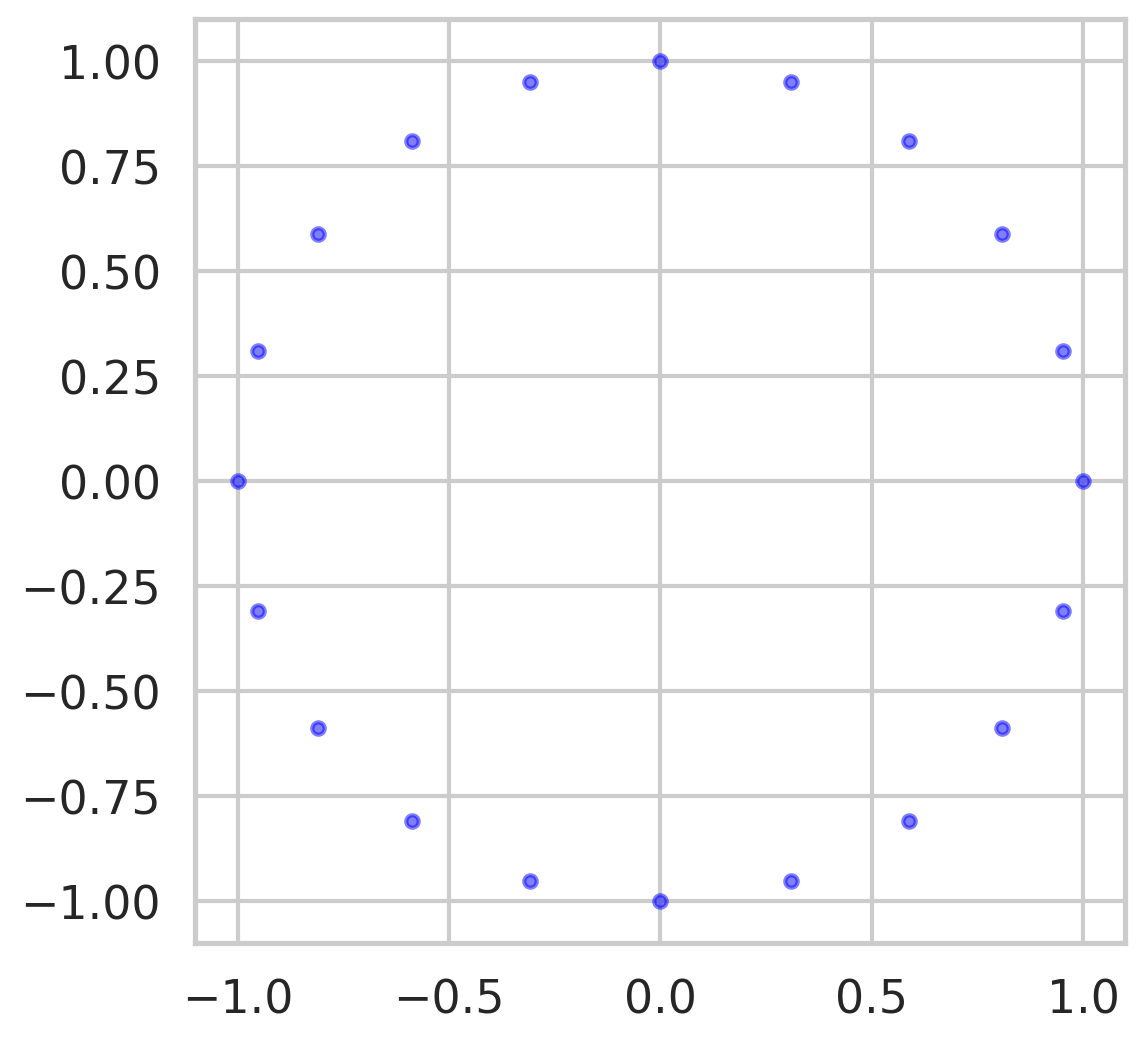

In [8]:
angle = np.linspace(0, 2 * np.pi, 20, endpoint=False)
X = np.append([np.cos(angle)], [np.sin(angle)], 0).transpose()
display_cluster(X)

Let's now group this data into two clusters.  We will use two different random states to initialize the algorithm. Settign a the __[random state](https://numpy.org/doc/stable/reference/random/legacy.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#numpy.random.RandomState)__ variable is useful for testing and allows us to seed the randomness (so we get the same results each time).


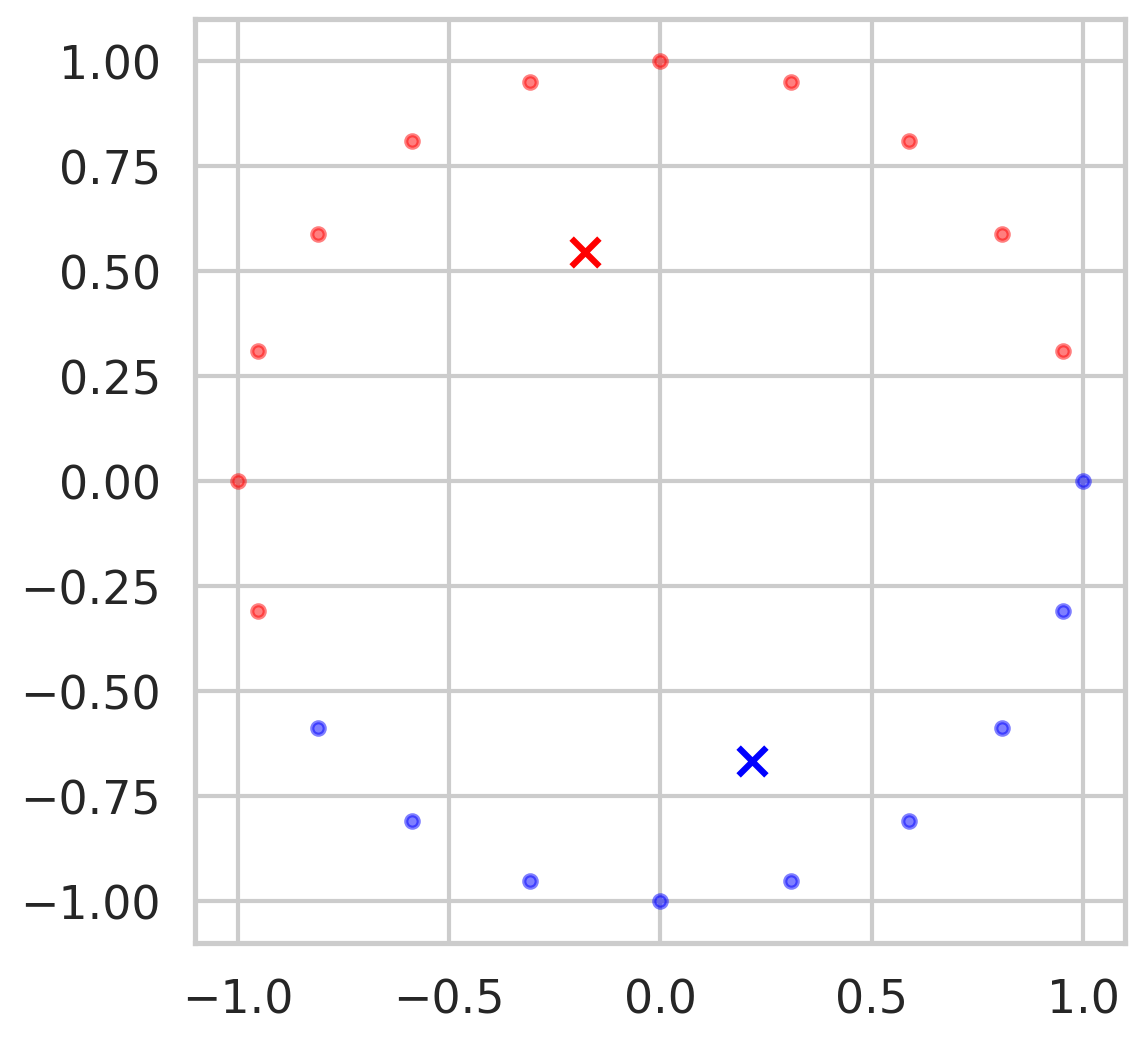

In [10]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters,
            random_state=10,
            n_init=1)
km.fit(X)
display_cluster(X, km, num_clusters)

Clustering with a random state of 20:


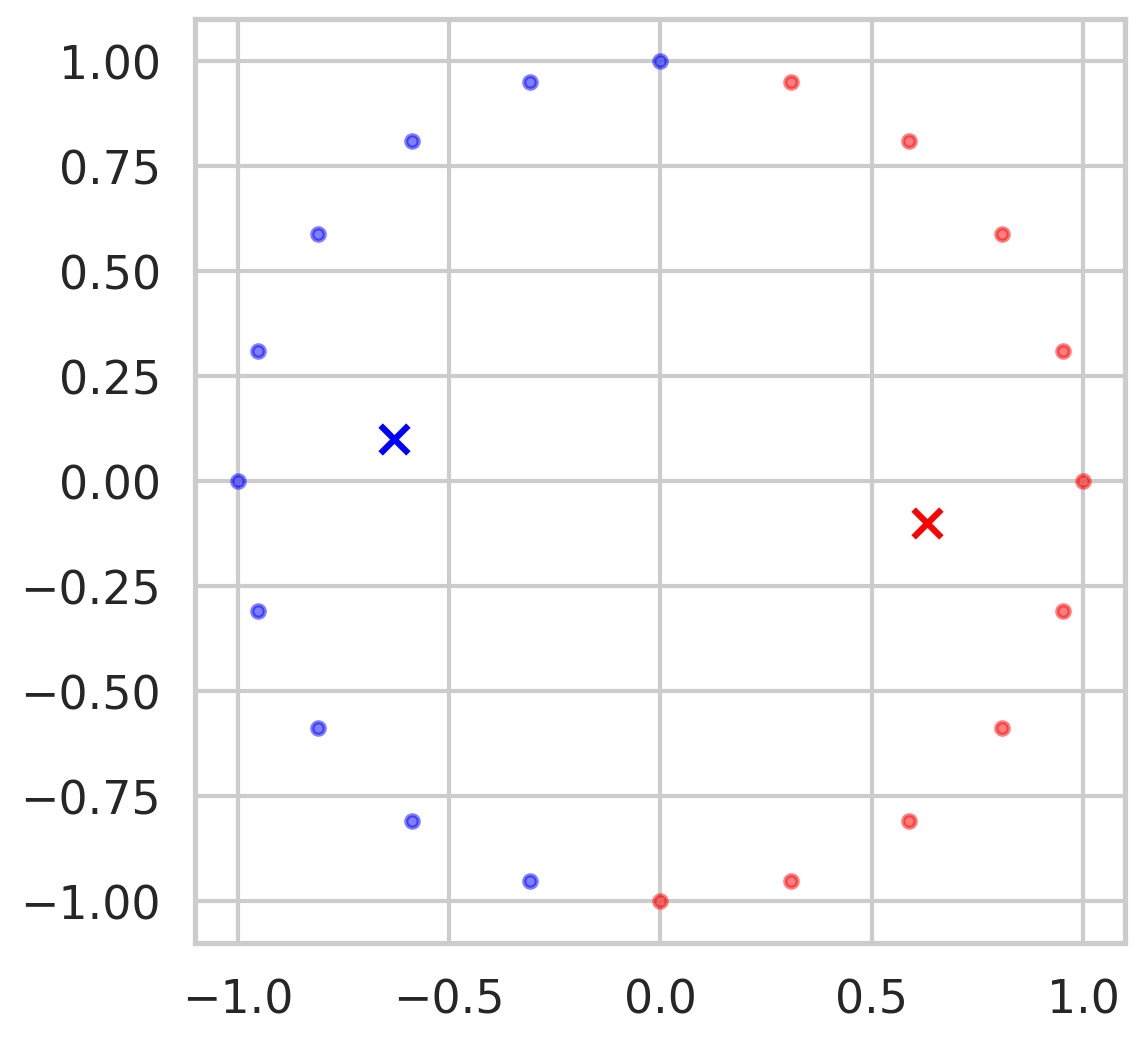

In [11]:
km = KMeans(n_clusters=num_clusters,
            random_state=20,
            n_init=1)
km.fit(X)
display_cluster(X, km, num_clusters)

### Determining optimium number of clusters

Let's create a new dataset that visually consists on a few clusters and try to group them.
